Dataset is downloaded from:-https://research.unsw.edu.au/projects/unsw-nb15-dataset

## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

**Data Loading, Analysis and Pre-processing**

In [2]:
df=pd.read_csv('/content/UNSW_NB15.csv')

In [3]:
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [5]:
df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [6]:
df.shape

(175341, 45)

In [7]:
df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [8]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"The column '{column}' has {len(unique_values)} unique values. Here are some of them: {unique_values[:10]}")
    print(150*'-')


The column 'id' has 175341 unique values. Here are some of them: [ 1  2  3  4  5  6  7  8  9 10]
------------------------------------------------------------------------------------------------------------------------------------------------------
The column 'dur' has 74039 unique values. Here are some of them: [0.121478 0.649902 1.623129 1.681642 0.449454 0.380537 0.637109 0.521584
 0.542905 0.258687]
------------------------------------------------------------------------------------------------------------------------------------------------------
The column 'proto' has 133 unique values. Here are some of them: ['tcp' 'udp' 'arp' 'ospf' 'icmp' 'igmp' 'rtp' 'ddp' 'ipv6-frag' 'cftp']
------------------------------------------------------------------------------------------------------------------------------------------------------
The column 'service' has 13 unique values. Here are some of them: ['-' 'ftp' 'smtp' 'snmp' 'http' 'ftp-data' 'dns' 'ssh' 'radius' 'pop3']
-----------------

In [9]:
threshold = 20

for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) < threshold:
        print(f"Value counts for column '{column}':")
        print(df[column].value_counts())
        print(150 * '-')

Value counts for column 'service':
service
-           94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
Value counts for column 'state':
state
INT    82275
FIN    77825
CON    13152
REQ     1991
RST       83
ECO       12
PAR        1
URN        1
no         1
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
Value counts for column 'sttl':
sttl
254    114743
31      39455
62      17681
0        3162
64        181
1          64
63         32
255        13
60          6
252         2
29          2
Name: count, dtype: in

In [10]:
df.replace('-', np.nan, inplace=True)

In [11]:
df.isnull().sum()

id                       0
dur                      0
proto                    0
service              94168
state                    0
spkts                    0
dpkts                    0
sbytes                   0
dbytes                   0
rate                     0
sttl                     0
dttl                     0
sload                    0
dload                    0
sloss                    0
dloss                    0
sinpkt                   0
dinpkt                   0
sjit                     0
djit                     0
swin                     0
stcpb                    0
dtcpb                    0
dwin                     0
tcprtt                   0
synack                   0
ackdat                   0
smean                    0
dmean                    0
trans_depth              0
response_body_len        0
ct_srv_src               0
ct_state_ttl             0
ct_dst_ltm               0
ct_src_dport_ltm         0
ct_dst_sport_ltm         0
ct_dst_src_ltm           0
i

In [12]:
service_mode = df['service'].mode()[0]
df['service'].fillna(service_mode, inplace=True)

In [13]:
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [14]:
df.nunique()

id                   175341
dur                   74039
proto                   133
service                  12
state                     9
spkts                   480
dpkts                   443
sbytes                 7214
dbytes                 6660
rate                  76991
sttl                     11
dttl                      6
sload                 80885
dload                 77474
sloss                   409
dloss                   370
sinpkt                76161
dinpkt                74245
sjit                  77532
djit                  76831
swin                     13
stcpb                 75265
dtcpb                 75089
dwin                      7
tcprtt                43319
synack                40142
ackdat                37708
smean                  1357
dmean                  1328
trans_depth              11
response_body_len      2386
ct_srv_src               52
ct_state_ttl              5
ct_dst_ltm               50
ct_src_dport_ltm         47
ct_dst_sport_ltm    

## **EDA**

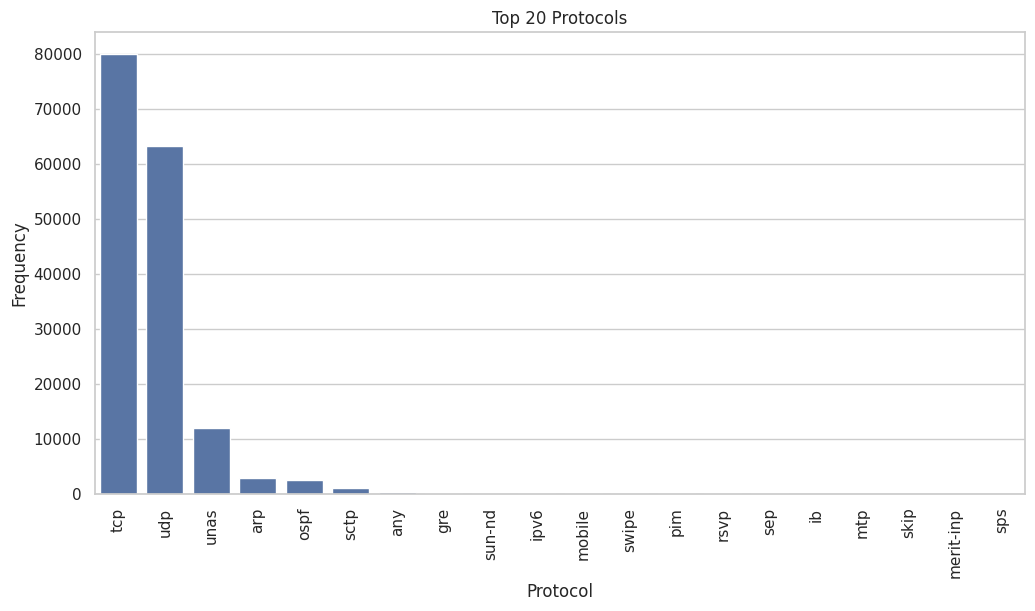

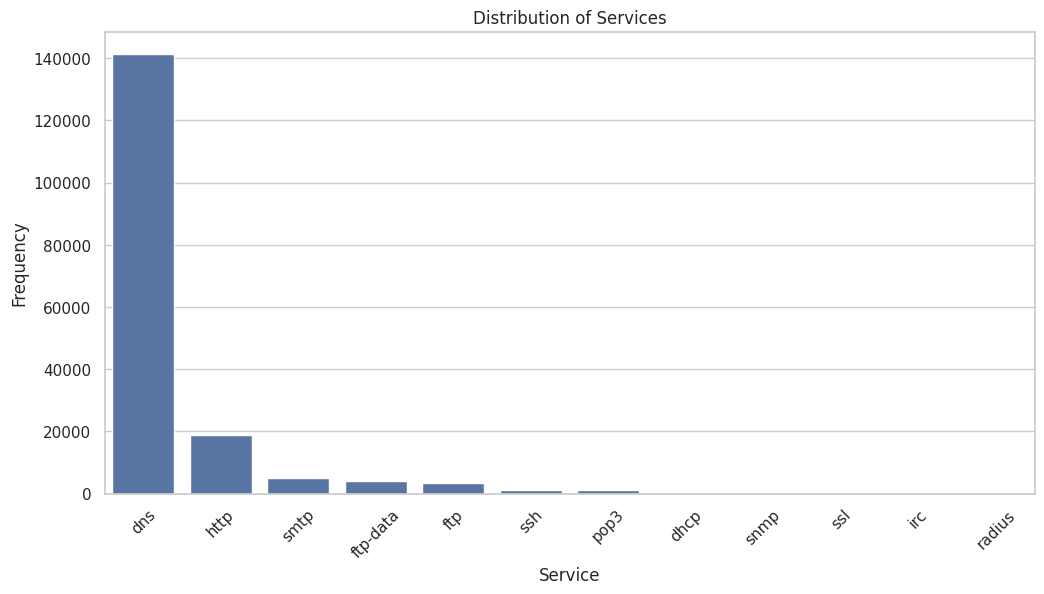

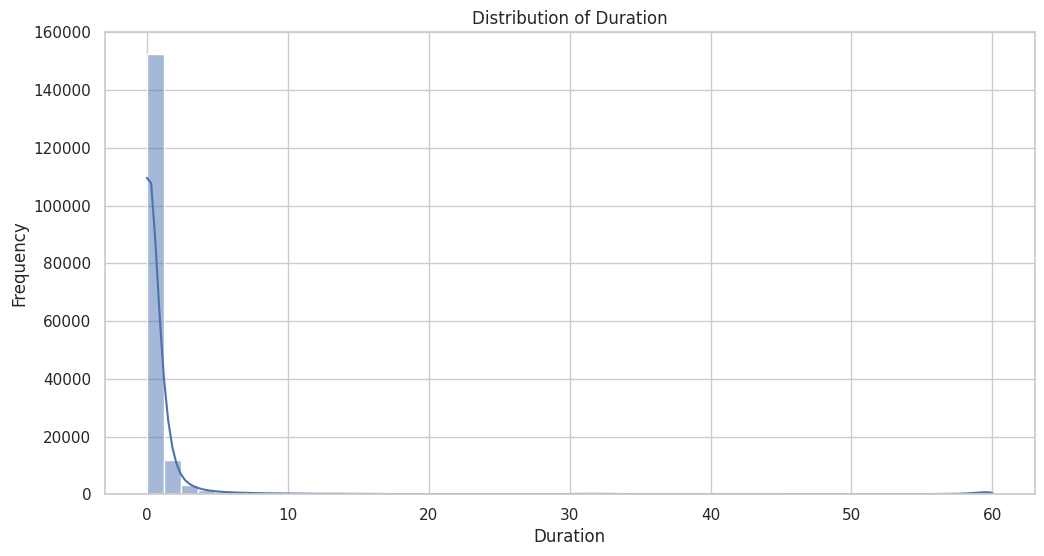

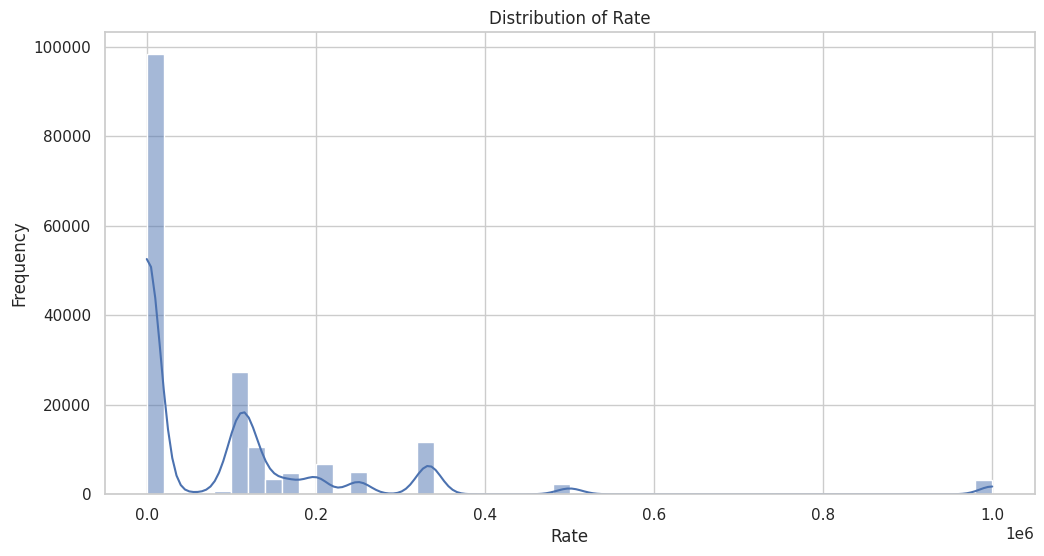

In [15]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
top_20_proto = df['proto'].value_counts().head(20)
sns.barplot(x=top_20_proto.index, y=top_20_proto.values)
plt.title('Top 20 Protocols')
plt.xlabel('Protocol')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='service', order=df['service'].value_counts().index)
plt.title('Distribution of Services')
plt.xlabel('Service')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
sns.histplot(df['dur'], bins=50, kde=True)
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['rate'], bins=50, kde=True)
plt.title('Distribution of Rate')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()

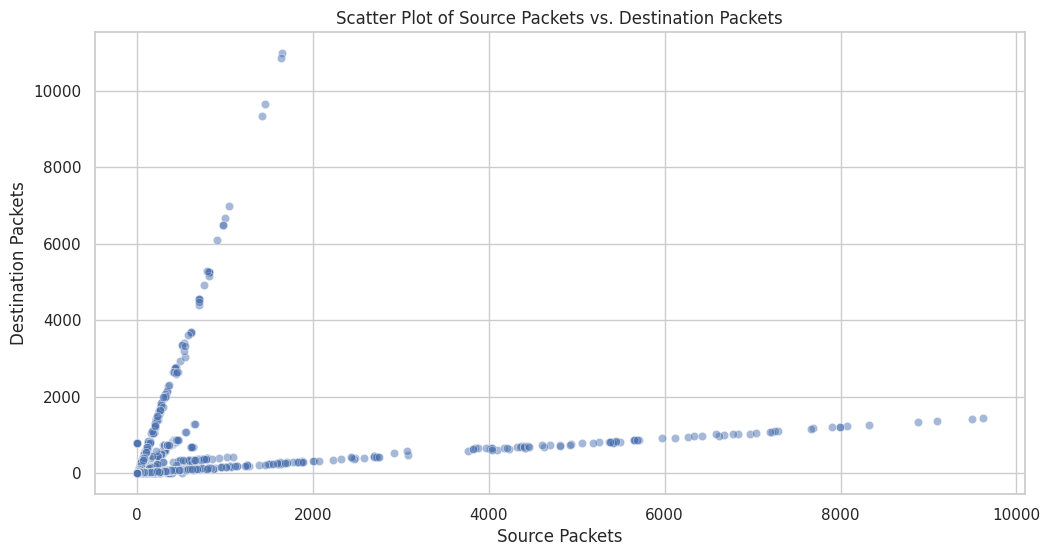

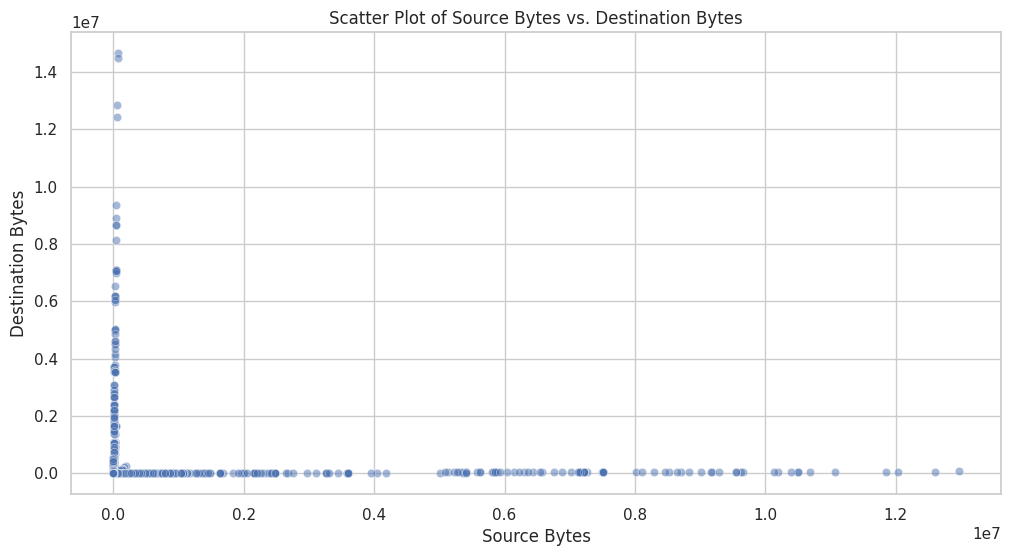

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='spkts', y='dpkts', alpha=0.5)
plt.title('Scatter Plot of Source Packets vs. Destination Packets')
plt.xlabel('Source Packets')
plt.ylabel('Destination Packets')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='sbytes', y='dbytes', alpha=0.5)
plt.title('Scatter Plot of Source Bytes vs. Destination Bytes')
plt.xlabel('Source Bytes')
plt.ylabel('Destination Bytes')
plt.show()

In [17]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if col != 'id']

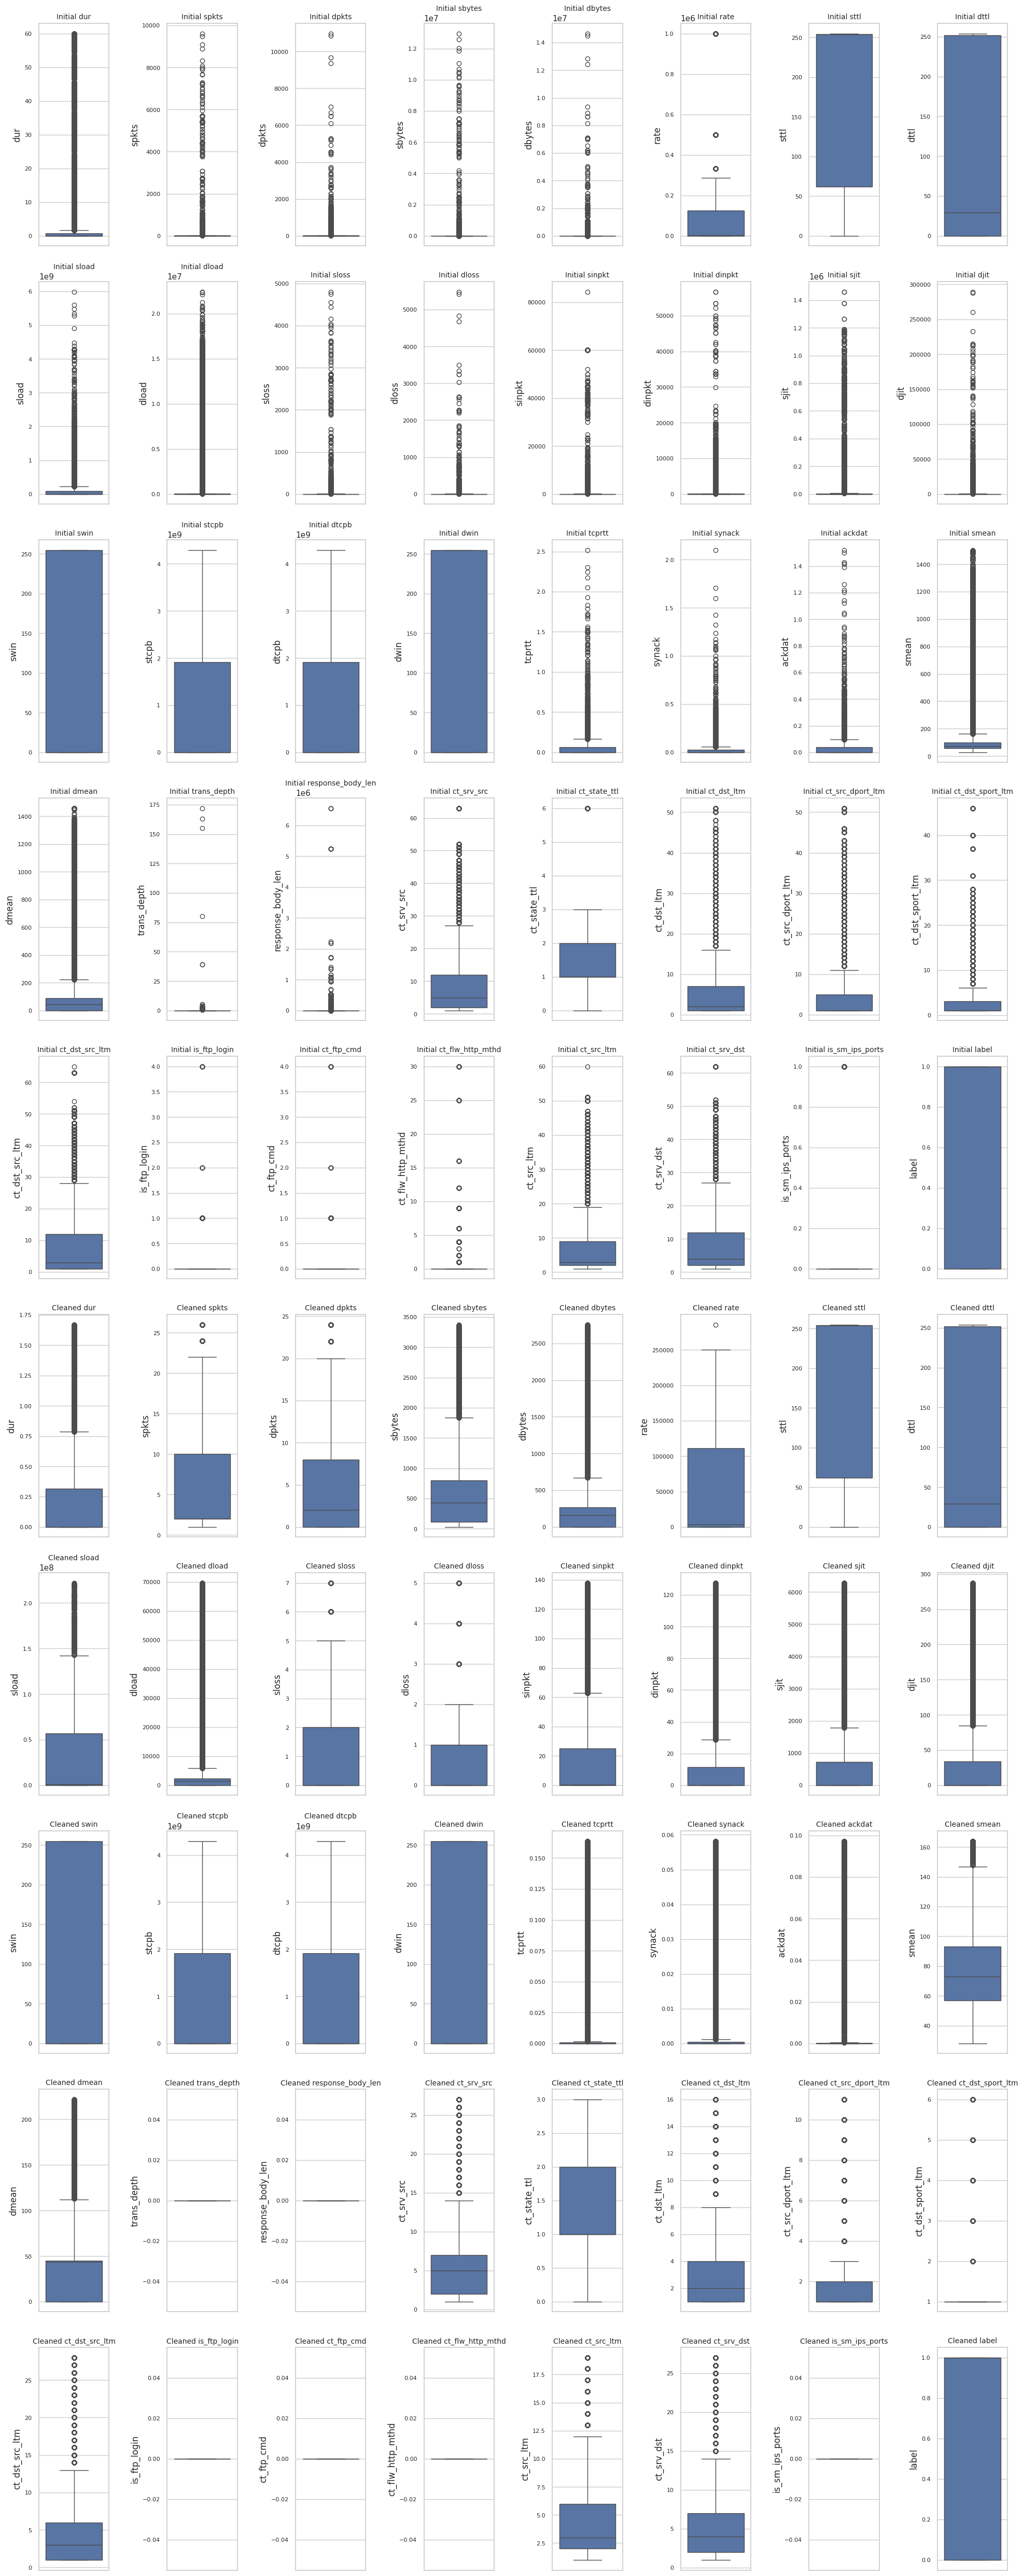

In [18]:
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[column].median()
    df[column] = df[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
    return df


df_cleaned = df.copy()

for col in numerical_cols:
    df_cleaned = replace_outliers_with_median(df_cleaned, col)

sns.set(style="whitegrid")

plots_per_row = 8
num_cols = len(numerical_cols)
num_rows = (2 * num_cols + plots_per_row - 1) // plots_per_row

plt.figure(figsize=(20, num_rows * 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, plots_per_row, i + 1)
    sns.boxplot(data=df[col])
    plt.title(f'Initial {col}', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, plots_per_row, len(numerical_cols) + i + 1)
    sns.boxplot(data=df_cleaned[col])
    plt.title(f'Cleaned {col}', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout(pad=2.0)
plt.show()


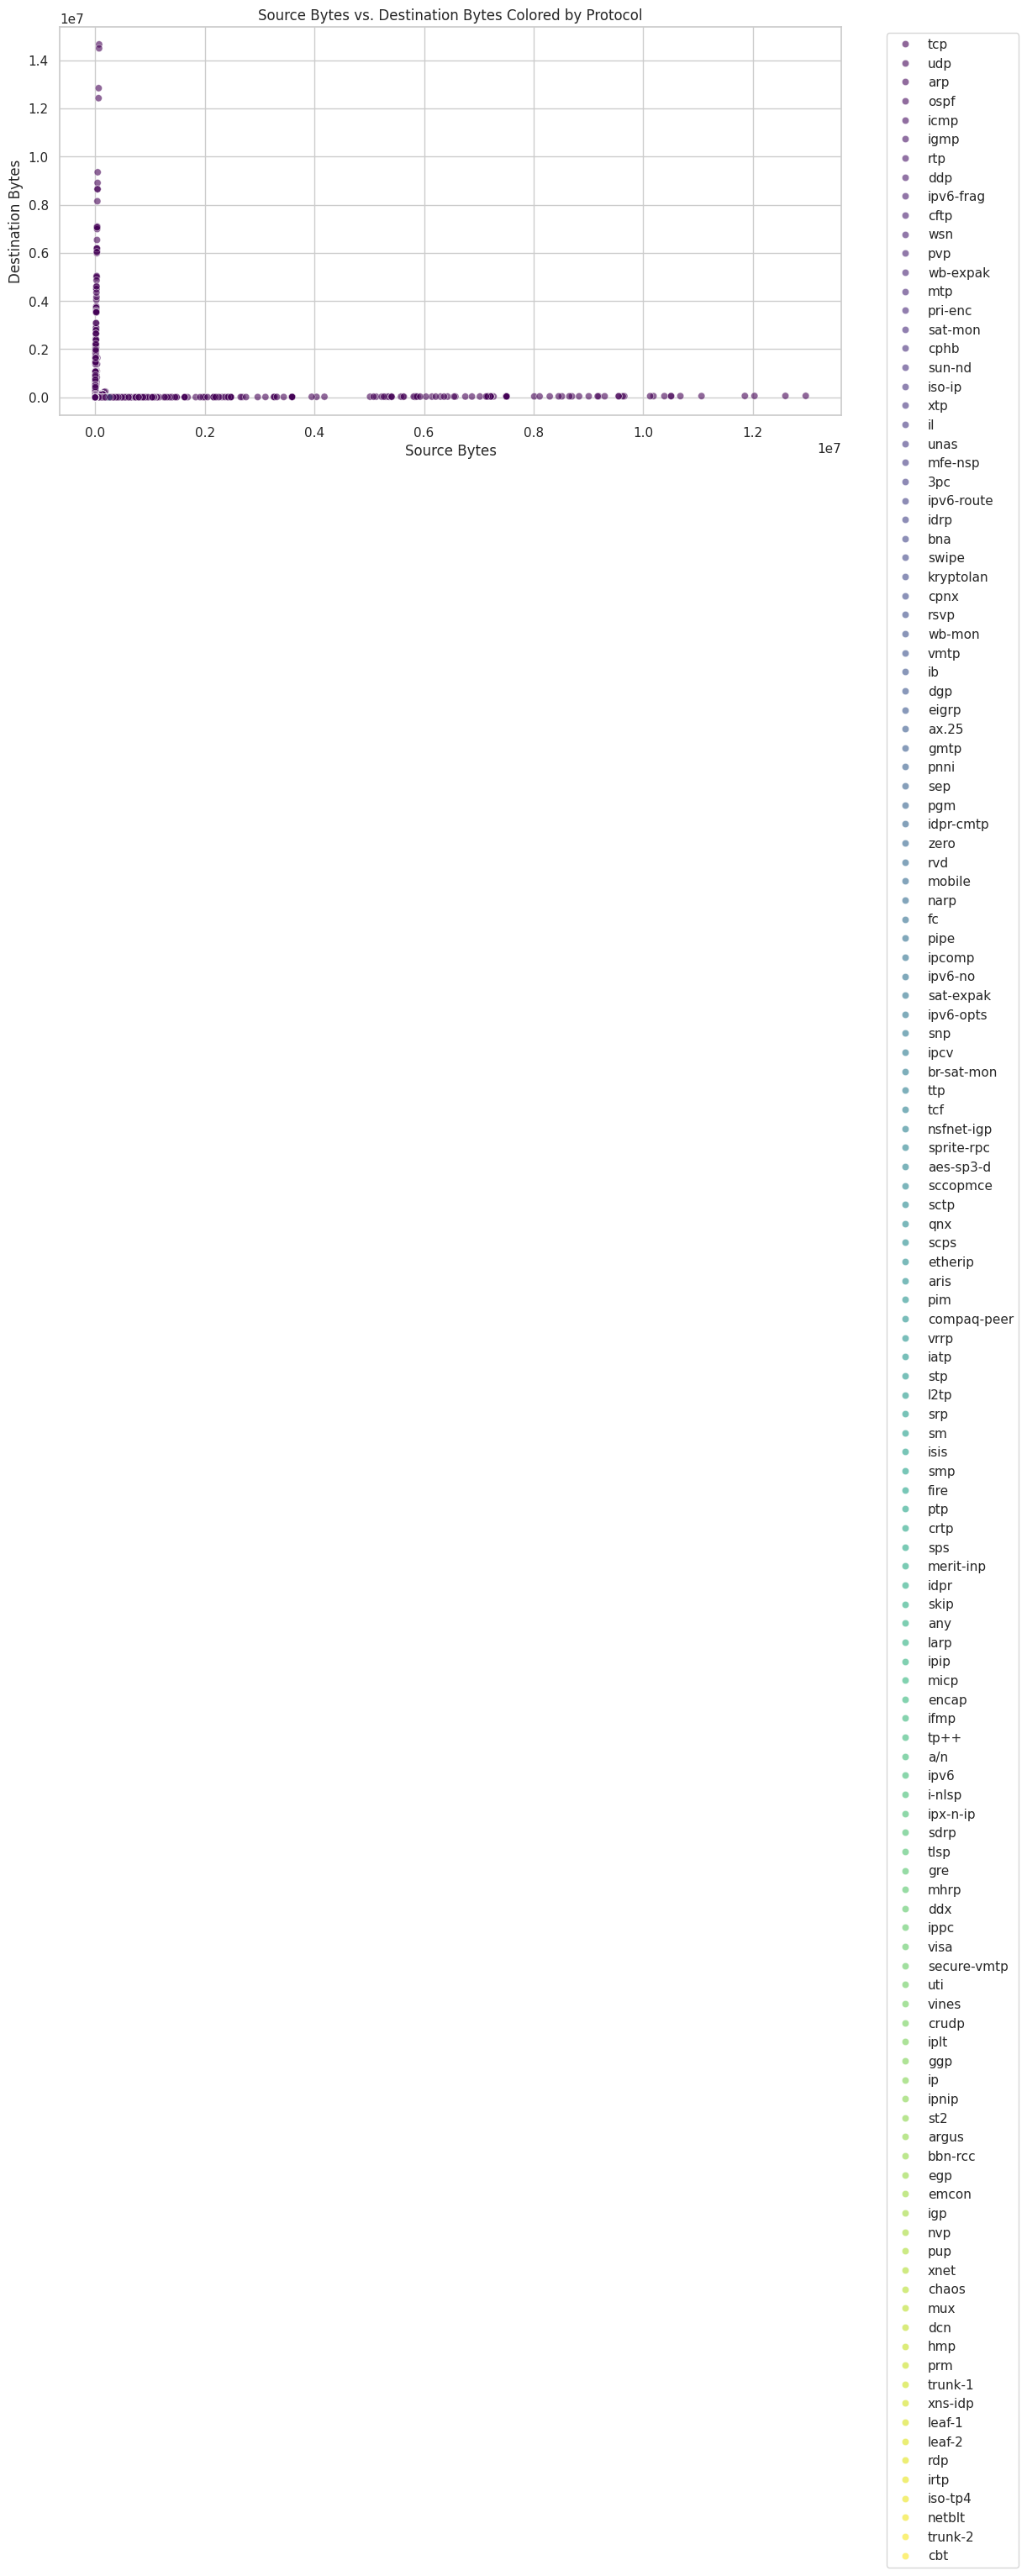

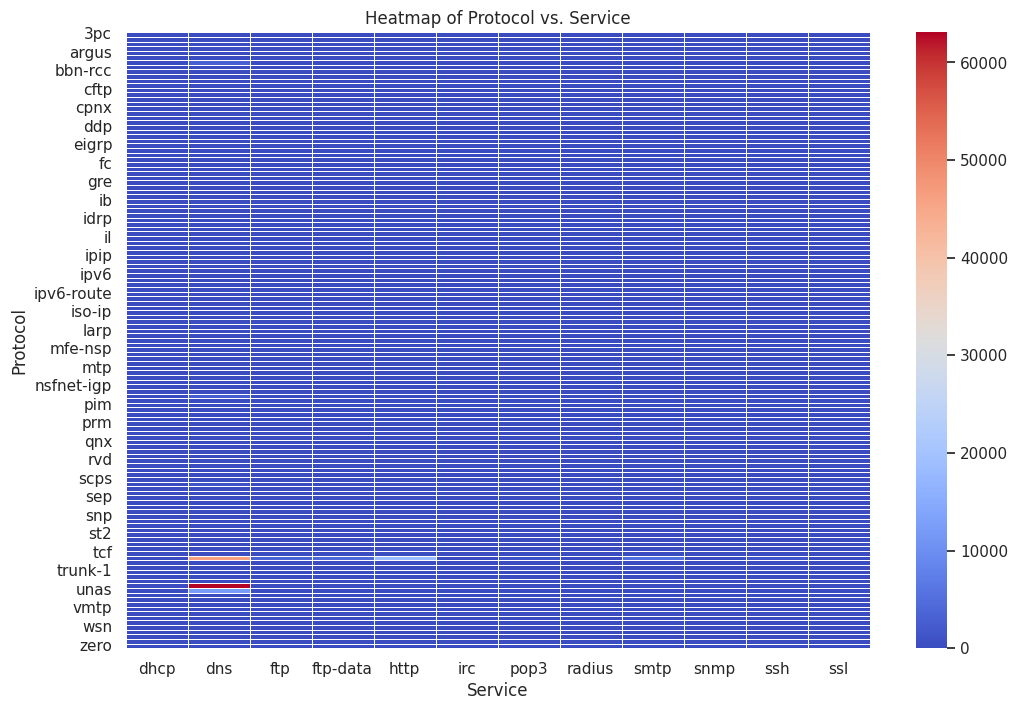

In [19]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='sbytes', y='dbytes', hue='proto', palette='viridis', alpha=0.6)
plt.title('Source Bytes vs. Destination Bytes Colored by Protocol')
plt.xlabel('Source Bytes')
plt.ylabel('Destination Bytes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

proto_service_counts = df.groupby(['proto', 'service']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(proto_service_counts, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Protocol vs. Service')
plt.xlabel('Service')
plt.ylabel('Protocol')
plt.show()

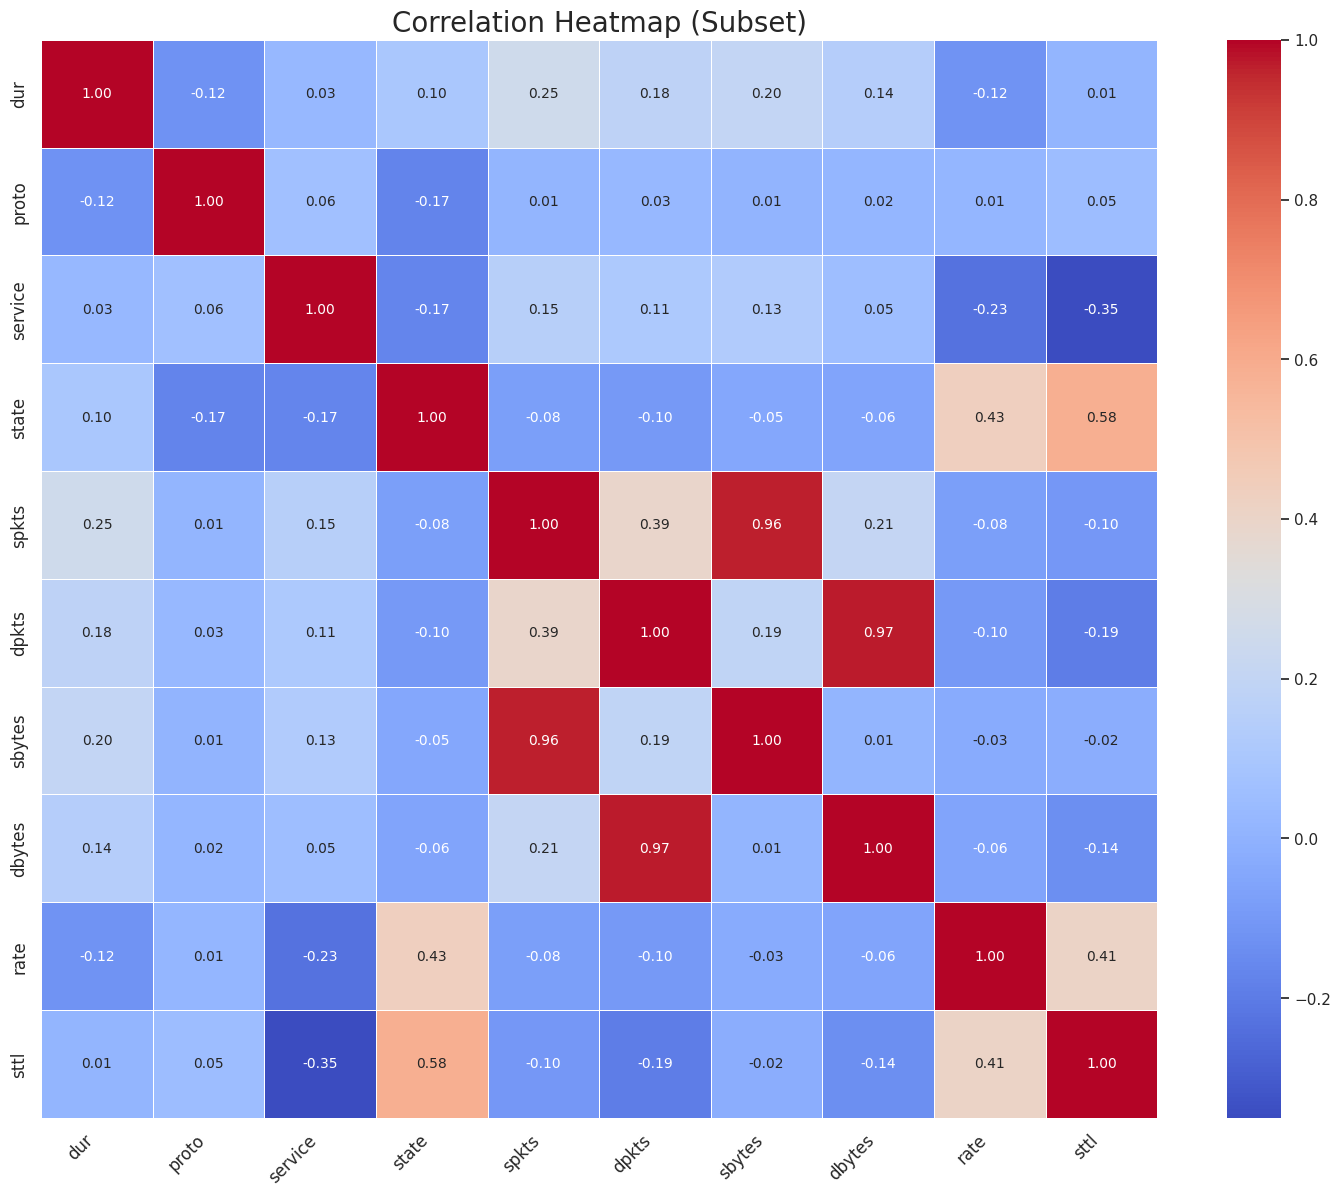

In [34]:
selected_cols = numerical_cols[:10]
corr_matrix_subset = df[selected_cols].corr()
plt.figure(figsize=(18, 14))


sns.heatmap(
    corr_matrix_subset,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    cbar=True,
    annot_kws={"size": 10},
    linewidths=.5,
    linecolor='white'
)

plt.title('Correlation Heatmap (Subset)', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [21]:
df['pkt_rate'] = df['spkts'] / df['dpkts'].replace(0, np.nan)
df['byte_rate'] = df['sbytes'] / df['dbytes'].replace(0, np.nan)
df['pkt_diff'] = df['spkts'] - df['dpkts']
df['byte_diff'] = df['sbytes'] - df['dbytes']
df['log_sbytes'] = np.log1p(df['sbytes'])
df['log_dbytes'] = np.log1p(df['dbytes'])

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = ['proto', 'service', 'state', 'attack_cat']

for col in categorical_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])
    else:
        print(f"Column '{col}' is missing in the dataframe.")

In [23]:
for column in df.columns:
    print(f"Column '{column}' is  '{df[column].dtype}'")

Column 'id' is  'int64'
Column 'dur' is  'float64'
Column 'proto' is  'int64'
Column 'service' is  'int64'
Column 'state' is  'int64'
Column 'spkts' is  'int64'
Column 'dpkts' is  'int64'
Column 'sbytes' is  'int64'
Column 'dbytes' is  'int64'
Column 'rate' is  'float64'
Column 'sttl' is  'int64'
Column 'dttl' is  'int64'
Column 'sload' is  'float64'
Column 'dload' is  'float64'
Column 'sloss' is  'int64'
Column 'dloss' is  'int64'
Column 'sinpkt' is  'float64'
Column 'dinpkt' is  'float64'
Column 'sjit' is  'float64'
Column 'djit' is  'float64'
Column 'swin' is  'int64'
Column 'stcpb' is  'int64'
Column 'dtcpb' is  'int64'
Column 'dwin' is  'int64'
Column 'tcprtt' is  'float64'
Column 'synack' is  'float64'
Column 'ackdat' is  'float64'
Column 'smean' is  'int64'
Column 'dmean' is  'int64'
Column 'trans_depth' is  'int64'
Column 'response_body_len' is  'int64'
Column 'ct_srv_src' is  'int64'
Column 'ct_state_ttl' is  'int64'
Column 'ct_dst_ltm' is  'int64'
Column 'ct_src_dport_ltm' is

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 51 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  int64  
 3   service            175341 non-null  int64  
 4   state              175341 non-null  int64  
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [25]:
X = df.drop(columns=['label'])
y = df['label']

numerical_cols = [
    'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sload', 'dload',
    'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb',
    'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean',
    'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl',
    'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
    'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst',
    'is_sm_ips_ports', 'pkt_rate', 'byte_rate', 'pkt_diff', 'byte_diff',
    'log_sbytes', 'log_dbytes'
]

X = X[numerical_cols]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_imputed, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

logistic_model = LogisticRegression(max_iter=1000)
knn_model = KNeighborsClassifier(n_neighbors=5)
nn_model = MLPClassifier(max_iter=300)

logistic_model.fit(X_train_resampled, y_train_resampled)
knn_model.fit(X_train_resampled, y_train_resampled)
nn_model.fit(X_train_resampled, y_train_resampled)

y_pred_logistic = logistic_model.predict(X_test_scaled)
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_nn = nn_model.predict(X_test_scaled)

y_pred_logistic_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]
y_pred_knn_proba = knn_model.predict_proba(X_test_scaled)[:, 1]
y_pred_nn_proba = nn_model.predict_proba(X_test_scaled)[:, 1]

def evaluate_model_binary(y_test, y_pred, y_pred_proba=None):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    if y_pred_proba is not None:
        print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
    else:
        print("ROC-AUC is not available for this model.")

print("Logistic Regression Performance:")
evaluate_model_binary(y_test, y_pred_logistic, y_pred_logistic_proba)

print("\nK-Nearest Neighbors Performance:")
evaluate_model_binary(y_test, y_pred_knn, y_pred_knn_proba)

print("\nNeural Network (MLPClassifier) Performance:")
evaluate_model_binary(y_test, y_pred_nn, y_pred_nn_proba)

Logistic Regression Performance:
Accuracy: 0.9075182967398536
Precision: 0.9382698768197089
Recall: 0.9264685556323428
F1 Score: 0.932331872870158
ROC-AUC: 0.9554886997296652

K-Nearest Neighbors Performance:
Accuracy: 0.9247219846022241
Precision: 0.9643938301859594
Recall: 0.9246717346233587
F1 Score: 0.9441151566469095
ROC-AUC: 0.972681721075064

Neural Network (MLPClassifier) Performance:
Accuracy: 0.9446820644425434
Precision: 0.9674019952227062
Recall: 0.9516240497581202
F1 Score: 0.9594481605351171
ROC-AUC: 0.9899920544152676


In [27]:
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

dt_model.fit(X_train_resampled, y_train_resampled)
rf_model.fit(X_train_resampled, y_train_resampled)

y_pred_dt = dt_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

y_pred_dt_proba = dt_model.predict_proba(X_test_scaled)[:, 1]
y_pred_rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

In [28]:
print("\nDecision Tree Performance:")
evaluate_model_binary(y_test, y_pred_dt, y_pred_dt_proba)

print("\nRandom Forest Performance:")
evaluate_model_binary(y_test, y_pred_rf, y_pred_rf_proba)



Decision Tree Performance:
Accuracy: 0.9459176884326584
Precision: 0.9645943685531084
Recall: 0.9564616447823082
F1 Score: 0.9605107918661947
ROC-AUC: 0.940408661318294

Random Forest Performance:
Accuracy: 0.9595095523239235
Precision: 0.9713415478333103
Recall: 0.9697304768486524
F1 Score: 0.9705353437543229
ROC-AUC: 0.9936760464385568


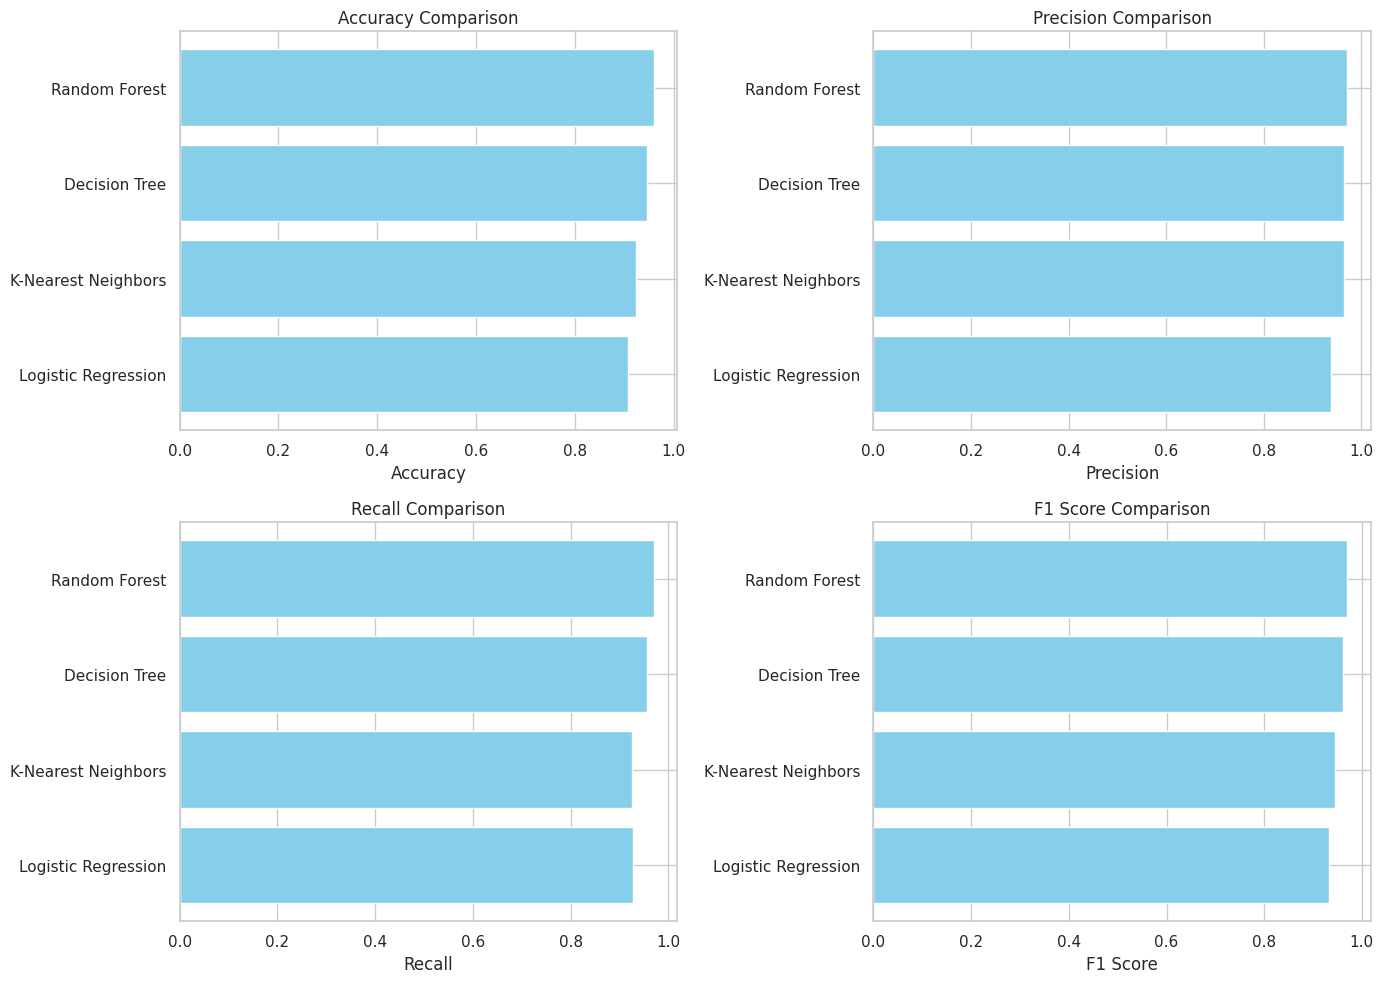

In [29]:
metrics = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, y_pred_logistic),
        "Precision": precision_score(y_test, y_pred_logistic),
        "Recall": recall_score(y_test, y_pred_logistic),
        "F1 Score": f1_score(y_test, y_pred_logistic)
    },
    "K-Nearest Neighbors": {
        "Accuracy": accuracy_score(y_test, y_pred_knn),
        "Precision": precision_score(y_test, y_pred_knn),
        "Recall": recall_score(y_test, y_pred_knn),
        "F1 Score": f1_score(y_test, y_pred_knn)
    },
    "Decision Tree": {
        "Accuracy": accuracy_score(y_test, y_pred_dt),
        "Precision": precision_score(y_test, y_pred_dt),
        "Recall": recall_score(y_test, y_pred_dt),
        "F1 Score": f1_score(y_test, y_pred_dt)
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, y_pred_rf),
        "Precision": precision_score(y_test, y_pred_rf),
        "Recall": recall_score(y_test, y_pred_rf),
        "F1 Score": f1_score(y_test, y_pred_rf)
    }
}

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for i, metric in enumerate(["Accuracy", "Precision", "Recall", "F1 Score"]):
    ax = axs[i // 2, i % 2]
    model_names = list(metrics.keys())
    scores = [metrics[model][metric] for model in model_names]
    ax.barh(model_names, scores, color='skyblue')
    ax.set_title(f'{metric} Comparison')
    ax.set_xlabel(metric)

plt.tight_layout()
plt.show()


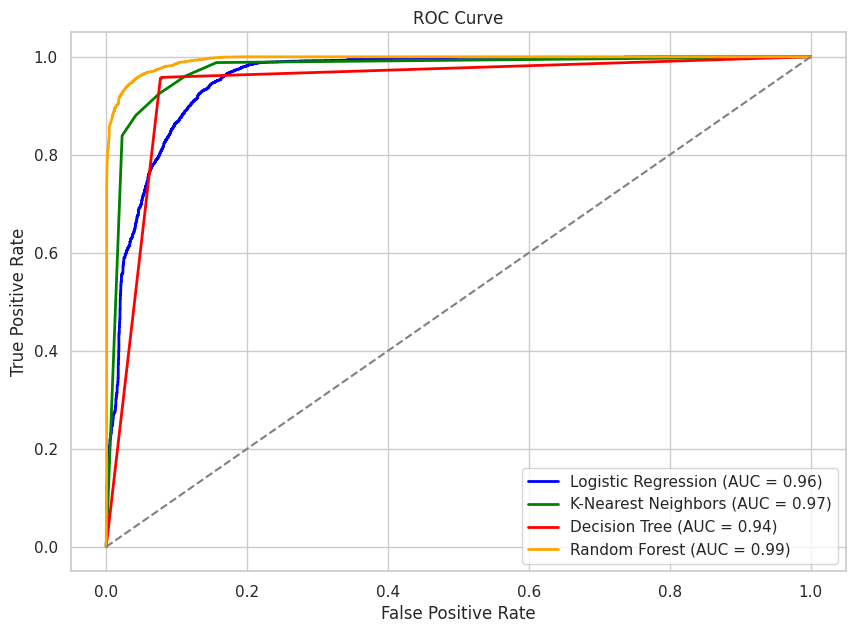

In [30]:
plt.figure(figsize=(10, 7))

fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_logistic_proba)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn_proba)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'K-Nearest Neighbors (AUC = {roc_auc_knn:.2f})')

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_proba)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='orange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [31]:
def get_top_features(model, feature_names, num_features=5):
    if hasattr(model, 'coef_'):
        importance = np.abs(model.coef_[0])
    elif hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
    else:
        raise ValueError("Model does not have feature importances.")

    top_indices = np.argsort(importance)[-num_features:]
    top_features = [(feature_names[i], importance[i]) for i in reversed(top_indices)]
    return top_features

feature_names = numerical_cols

print("Top 5 Features for Logistic Regression:")
top_features_logistic = get_top_features(logistic_model, feature_names)
for feature, importance in top_features_logistic:
    print(f"Feature: {feature}, Importance: {importance}")

print("\nTop 5 Features for Decision Tree:")
top_features_decision_tree = get_top_features(dt_model, feature_names)
for feature, importance in top_features_decision_tree:
    print(f"Feature: {feature}, Importance: {importance}")

print("\nTop 5 Features for Random Forest:")
top_features_random_forest = get_top_features(rf_model, feature_names)
for feature, importance in top_features_random_forest:
    print(f"Feature: {feature}, Importance: {importance}")


Top 5 Features for Logistic Regression:
Feature: dload, Importance: 25.65035693739728
Feature: ct_state_ttl, Importance: 17.64541530866773
Feature: dwin, Importance: 16.906692182708742
Feature: swin, Importance: 16.811334842321163
Feature: ct_dst_sport_ltm, Importance: 12.48358484189485

Top 5 Features for Decision Tree:
Feature: ct_state_ttl, Importance: 0.5491315045348938
Feature: log_sbytes, Importance: 0.13485883693938647
Feature: ct_srv_dst, Importance: 0.09417792618832208
Feature: smean, Importance: 0.028069605201242714
Feature: ct_dst_src_ltm, Importance: 0.026019993820128647

Top 5 Features for Random Forest:
Feature: ct_state_ttl, Importance: 0.15066535165089226
Feature: dload, Importance: 0.06656154322985014
Feature: sload, Importance: 0.06624336616587397
Feature: rate, Importance: 0.04841072032322531
Feature: ct_srv_dst, Importance: 0.04048501476069669


In [36]:
def evaluate_model_binary(y_test, y_pred, y_pred_proba=None):
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }
    if y_pred_proba is not None:
        metrics["ROC-AUC"] = roc_auc_score(y_test, y_pred_proba)
    else:
        metrics["ROC-AUC"] = "N/A"
    return metrics

logistic_metrics = evaluate_model_binary(y_test, y_pred_logistic, y_pred_logistic_proba)
knn_metrics = evaluate_model_binary(y_test, y_pred_knn, y_pred_knn_proba)
nn_metrics = evaluate_model_binary(y_test, y_pred_nn, y_pred_nn_proba)
dt_metrics = evaluate_model_binary(y_test, y_pred_dt, y_pred_dt_proba)
rf_metrics = evaluate_model_binary(y_test, y_pred_rf, y_pred_rf_proba)

print("Logistic Regression Performance:")
print(logistic_metrics)
print("\nK-Nearest Neighbors Performance:")
print(knn_metrics)
print("\nNeural Network (MLPClassifier) Performance:")
print(nn_metrics)
print("\nDecision Tree Performance:")
print(dt_metrics)
print("\nRandom Forest Performance:")
print(rf_metrics)

models_metrics = {
    "Logistic Regression": logistic_metrics,
    "K-Nearest Neighbors": knn_metrics,
    "Neural Network": nn_metrics,
    "Decision Tree": dt_metrics,
    "Random Forest": rf_metrics
}

best_model = max(models_metrics, key=lambda k: models_metrics[k]["F1 Score"])
print(f"\nBest Model based on F1 Score: {best_model}")
print(models_metrics[best_model])

Logistic Regression Performance:
{'Accuracy': 0.9075182967398536, 'Precision': 0.9382698768197089, 'Recall': 0.9264685556323428, 'F1 Score': 0.932331872870158, 'ROC-AUC': 0.9554886997296652}

K-Nearest Neighbors Performance:
{'Accuracy': 0.9247219846022241, 'Precision': 0.9643938301859594, 'Recall': 0.9246717346233587, 'F1 Score': 0.9441151566469095, 'ROC-AUC': 0.972681721075064}

Neural Network (MLPClassifier) Performance:
{'Accuracy': 0.9446820644425434, 'Precision': 0.9674019952227062, 'Recall': 0.9516240497581202, 'F1 Score': 0.9594481605351171, 'ROC-AUC': 0.9899920544152676}

Decision Tree Performance:
{'Accuracy': 0.9459176884326584, 'Precision': 0.9645943685531084, 'Recall': 0.9564616447823082, 'F1 Score': 0.9605107918661947, 'ROC-AUC': 0.940408661318294}

Random Forest Performance:
{'Accuracy': 0.9595095523239235, 'Precision': 0.9713415478333103, 'Recall': 0.9697304768486524, 'F1 Score': 0.9705353437543229, 'ROC-AUC': 0.9936760464385568}

Best Model based on F1 Score: Random Fo